In [1]:
import sys
import torch
import ot

import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../lib")
from distributions import sampleWrappedNormal
from utils_hyperbolic import *
from hsw import hyper_sliced_wasserstein
from hhsw import horo_hyper_sliced_wasserstein_lorentz, horo_hyper_sliced_wasserstein_poincare
from sw import sliced_wasserstein
from utility import *
import time

# device = "cuda:1" if torch.cuda.is_available() else "cpu"
device = "cpu"

In [2]:
d = 2
K = [3,5,7,9,11]
N = [100,200,400,800,1600,3200,6400]
R = 50

res = np.zeros((len(N),len(K)))
vres = np.zeros((len(N),len(K)))
tres = np.zeros((len(N),len(K)))

np.random.seed(42)
for i in range(len(N)):
    n = N[i]
    for j in range(len(K)):
        k = K[j]
        temp = np.zeros(R)
        tt = 0 
        for r in range(R):
            X = torch.from_numpy(np.random.random((n,d))/2).to(device)
            Y = torch.from_numpy(np.random.random((n,d))/2).to(device)

            t = time.time()
            temp[r] = SFW(X,Y,hyperbolic_model="Poincare",spf_curve="Hk_p",k=k)
            tt += time.time()-t

        res[i,j] = np.mean(temp)
        vres[i,j] = np.std(temp)
        tres[i,j] = tt/R

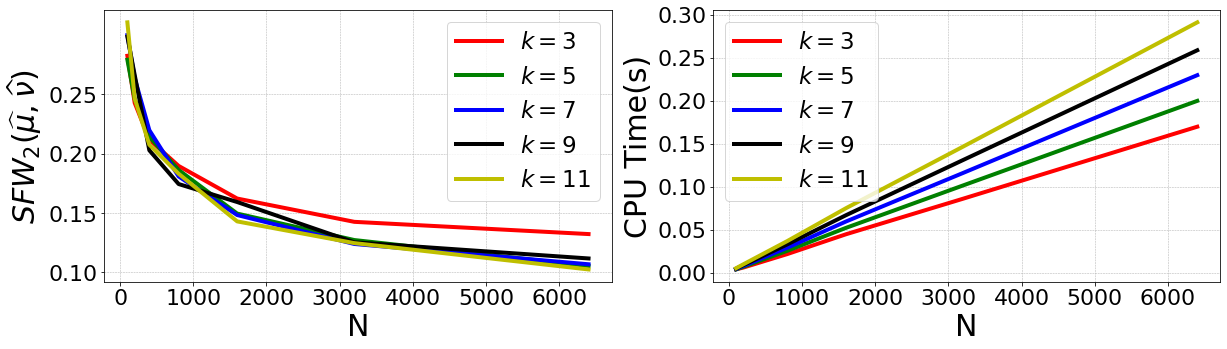

In [4]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(N,res[:,0],c='r',label=r'$k=3$',linewidth=4)
plt.plot(N,res[:,1],c='g',label=r'$k=5$',linewidth=4)
plt.plot(N,res[:,2],c='b',label=r'$k=7$',linewidth=4)
plt.plot(N,res[:,3],c='k',label=r'$k=9$',linewidth=4)
plt.plot(N,res[:,4],c='y',label=r'$k=11$',linewidth=4)

plt.legend(fontsize=23,loc='upper right')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.xlabel('N', fontsize=30)
plt.ylabel(r'$SFW_2(\widehat{\mu},\widehat{\nu})$', fontsize=30)
plt.xticks(fontsize=22)
plt.yticks([0.1,0.15,0.2,0.25],fontsize=22)

plt.subplot(1,2,2)
plt.plot(N,tres[:,0],c='r',label=r'$k=3$',linewidth=4)
plt.plot(N,tres[:,1],c='g',label=r'$k=5$',linewidth=4)
plt.plot(N,tres[:,2],c='b',label=r'$k=7$',linewidth=4)
plt.plot(N,tres[:,3],c='k',label=r'$k=9$',linewidth=4)
plt.plot(N,tres[:,4],c='y',label=r'$k=11$',linewidth=4)

plt.legend(fontsize=23,loc='upper left')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.xlabel('N', fontsize=30)
plt.ylabel(r'CPU Time(s)', fontsize=30)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)


plt.savefig("./Hk_d2.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [5]:
d = 10
K = [3,5,7,9,11]
N = [100,200,400,800,1600,3200,6400]
R = 50

res = np.zeros((len(N),len(K)))
vres = np.zeros((len(N),len(K)))
tres = np.zeros((len(N),len(K)))

np.random.seed(42)
for i in range(len(N)):
    n = N[i]
    for j in range(len(K)):
        k = K[j]
        temp = np.zeros(R)
        tt = 0 
        for r in range(R):
            X = torch.from_numpy(np.random.random((n,d))/2).to(device)
            Y = torch.from_numpy(np.random.random((n,d))/2).to(device)

            t = time.time()
            temp[r] = SFW(X,Y,hyperbolic_model="Poincare",spf_curve="Hk_p",k=k)
            tt += time.time()-t

        res[i,j] = np.mean(temp)
        vres[i,j] = np.std(temp)
        tres[i,j] = tt/R

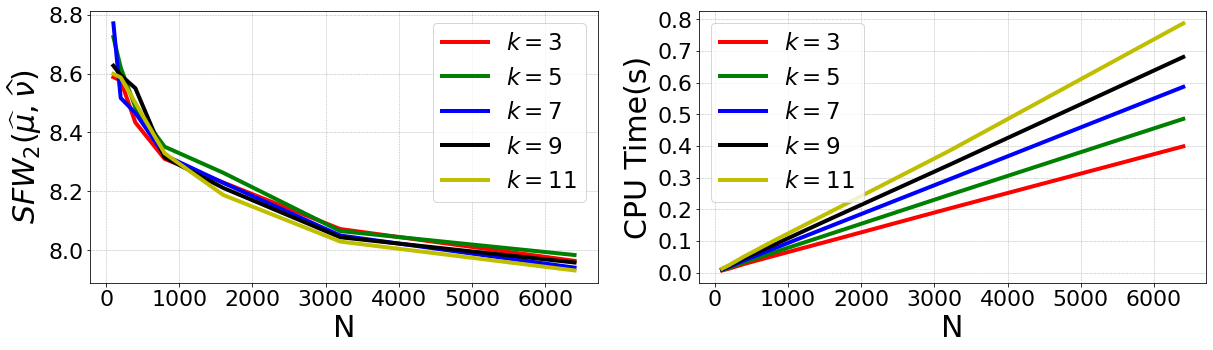

In [7]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(N,res[:,0],c='r',label=r'$k=3$',linewidth=4)
plt.plot(N,res[:,1],c='g',label=r'$k=5$',linewidth=4)
plt.plot(N,res[:,2],c='b',label=r'$k=7$',linewidth=4)
plt.plot(N,res[:,3],c='k',label=r'$k=9$',linewidth=4)
plt.plot(N,res[:,4],c='y',label=r'$k=11$',linewidth=4)

plt.legend(fontsize=23,loc='upper right')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.xlabel('N', fontsize=30)
plt.ylabel(r'$SFW_2(\widehat{\mu},\widehat{\nu})$', fontsize=30)
plt.xticks(fontsize=22)
plt.yticks([8.0,8.2,8.4,8.6,8.8],fontsize=22)

plt.subplot(1,2,2)
plt.plot(N,tres[:,0],c='r',label=r'$k=3$',linewidth=4)
plt.plot(N,tres[:,1],c='g',label=r'$k=5$',linewidth=4)
plt.plot(N,tres[:,2],c='b',label=r'$k=7$',linewidth=4)
plt.plot(N,tres[:,3],c='k',label=r'$k=9$',linewidth=4)
plt.plot(N,tres[:,4],c='y',label=r'$k=11$',linewidth=4)

plt.legend(fontsize=23,loc='upper left')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.xlabel('N', fontsize=30)
plt.ylabel(r'CPU Time(s)', fontsize=30)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)


plt.savefig("./Hk_d10.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [8]:
n = 100
K = [3,5,7,9,11]
D = [2,4,6,8,16,32]
R = 50

res = np.zeros((len(D),len(K)))
vres = np.zeros((len(D),len(K)))
tres = np.zeros((len(D),len(K)))

np.random.seed(42)
for i in range(len(D)):
    d = D[i]
    for j in range(len(K)):
        k = K[j]
        temp = np.zeros(R)
        tt = 0 
        for r in range(R):
            X = torch.from_numpy(np.random.random((n,d))/2).to(device)
            Y = torch.from_numpy(np.random.random((n,d))/2).to(device)

            t = time.time()
            temp[r] = SFW(X,Y,hyperbolic_model="Poincare",spf_curve="Hk_p",k=k)
            tt += time.time()-t

        res[i,j] = np.mean(temp)
        vres[i,j] = np.std(temp)
        tres[i,j] = tt/R

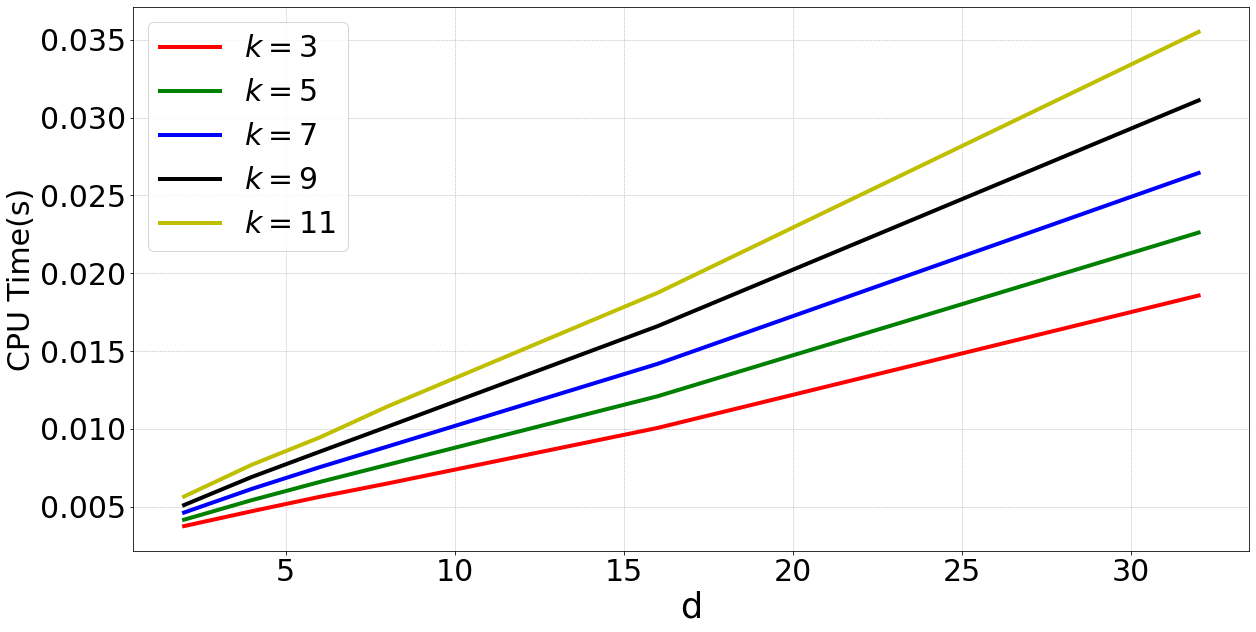

In [9]:
plt.figure(figsize=(20,10))
plt.plot(D,tres[:,0],c='r',label=r'$k=3$',linewidth=4)
plt.plot(D,tres[:,1],c='g',label=r'$k=5$',linewidth=4)
plt.plot(D,tres[:,2],c='b',label=r'$k=7$',linewidth=4)
plt.plot(D,tres[:,3],c='k',label=r'$k=9$',linewidth=4)
plt.plot(D,tres[:,4],c='y',label=r'$k=11$',linewidth=4)



plt.legend(fontsize=30,loc='upper left')
plt.grid(linestyle = '--', linewidth = 0.5)
plt.xlabel('d', fontsize=35)
plt.ylabel(r'CPU Time(s)', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.savefig("./Hk_n100.pdf", format="pdf", bbox_inches="tight")
plt.show()
